In [1]:
%%capture
import stata_setup, os
if os.name == 'nt':
    stata_setup.config('C:/Program Files/Stata17/','mp')
else:
    stata_setup.config('/usr/local/stata17','mp')

In [2]:
%%stata -qui

use "../data/data", clear
rename log_flesch_kincaid_grade_level FKG
quietly tabulate year, generate(y_)
quietly tabulate cluster, generate(c_)

local journals  ecm jpe qje res  //AER based category

local jel_imp a_imp b_imp c_imp  e_imp f_imp g_imp h_imp i_imp j_imp k_imp /// 
		l_imp m_imp n_imp o_imp p_imp q_imp r_imp y_imp z_imp // D JEL based case

## Ridge Regression

The ridge regression estimator

$$
\widehat{\beta}_{\text {ridge }}=\left(\boldsymbol{X}^{\prime} \boldsymbol{X}+\lambda \boldsymbol{I}_{p}\right)^{-1} \boldsymbol{X}^{\prime} \boldsymbol{Y}
$$

where $\lambda>0$ is called the _ridge_ parameter.

In [3]:
%%stata -qui -eret steret
#delimit ;
quietly elasticnet linear FKG log_num_authors log_num_pages both_genders prop_women
        `journals' `jel_imp' y_2-y_20  c_2-c_215  jel_flag, alpha(0) lambda(5.34) nolog;
#delimit cr

In [4]:
import numpy as np
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
steret['e(b)']

array([[-0.001,  0.002, -0.001, -0.003,  0.005, -0.003, -0.001,  0.002,
        -0.005, -0.003,  0.004, -0.001, -0.001, -0.001, -0.000,  0.000,
        -0.002, -0.003, -0.003, -0.004, -0.000,  0.000,  0.005,  0.003,
        -0.001,  0.004, -0.004,  0.003,  0.000, -0.001, -0.002, -0.002,
        -0.001, -0.002, -0.001, -0.001, -0.003,  0.001,  0.003, -0.000,
         0.002, -0.001,  0.002,  0.003, -0.001, -0.002,  0.026,  0.052,
         0.015,  0.015,  0.002,  0.007, -0.001,  0.000,  0.002,  0.039,
         0.050, -0.003,  0.002,  0.034, -0.014, -0.031, -0.025, -0.012,
         0.010, -0.014, -0.016, -0.001,  0.024, -0.007,  0.009,  0.002,
         0.026, -0.015, -0.005, -0.026,  0.027, -0.022, -0.056, -0.002,
        -0.021,  0.020,  0.007,  0.005,  0.037,  0.006, -0.004, -0.015,
         0.009, -0.008, -0.010,  0.009, -0.056, -0.004, -0.026, -0.013,
        -0.020, -0.001, -0.031, -0.025, -0.003, -0.004,  0.025, -0.006,
         0.000,  0.030,  0.024,  0.012,  0.043,  0.005, -0.000, 

In [5]:
%%stata
#delimit ;
elasticnet linear FKG log_num_authors log_num_pages both_genders prop_women
        `journals' `jel_imp' y_2-y_20  c_2-c_215  jel_flag,
        alpha(0) lambda(1.3(.1)1.5) folds(4988) nolog;
#delimit cr


. #delimit ;
delimiter now ;
. elasticnet linear FKG log_num_authors log_num_pages both_genders prop_women
>         `journals' `jel_imp' y_2-y_20  c_2-c_215  jel_flag,
>         alpha(0) lambda(1.3(.1)1.5) folds(4988) nolog;

Elastic net linear model                         No. of obs        =      4,988
                                                 No. of covariates =        260
Selection: Cross-validation                      No. of CV folds   =      4,988

-------------------------------------------------------------------------------
               |                               No. of      Out-of-      CV mean
               |                              nonzero       sample   prediction
alpha       ID |     Description      lambda    coef.    R-squared        error
---------------+---------------------------------------------------------------
0.000          |
             1 |    first lambda         1.5      260       0.0221     .0275093
           * 2 | selected lambda  

In [6]:
%%stata -qui
#delimit ;
elasticnet linear FKG log_num_authors log_num_pages both_genders prop_women
        `journals' `jel_imp' y_2-y_20  c_2-c_215  jel_flag,
        alpha(0) lambda(1.4) nolog;
#delimit cr

In [7]:
%stata matrix list r(table)


r(table)[9,247]
        log_num_au~s  log_num_pa~s  both_genders    prop_women           ecm
     b     -.0038518     .01776194     .00007089    -.01735091     .02353282
    se     .00638722     .00848627     .00789672     .01175006     .00891076
     t     -.6030483     2.0930212     .00897685    -1.4766652     2.6409455
pvalue     .54650541     .03640028     .99283798     .13983181     .00829462
    ll    -.01637372     .00112491    -.01541034     -.0403865      .0060636
    ul     .00867011     .03439898     .01555212     .00568467     .04100204
    df          4741          4741          4741          4741          4741
  crit     1.9604645     1.9604645     1.9604645     1.9604645     1.9604645
 eform             0             0             0             0             0

                 jpe           qje           res         a_imp         b_imp
     b    -.01346722    -.00686827     .01397137    -.02455158    -.00913661
    se     .00863138     .00885875     .00768578     .0343


. predict FKG_hat, xb
(option penalized assumed; linear prediction with penalized coefficients)

. gen ehat = FKG - FKG_hat

. set scheme s1mono

. histogram ehat
(bin=36, start=-.76672113, width=.05706192)

. 


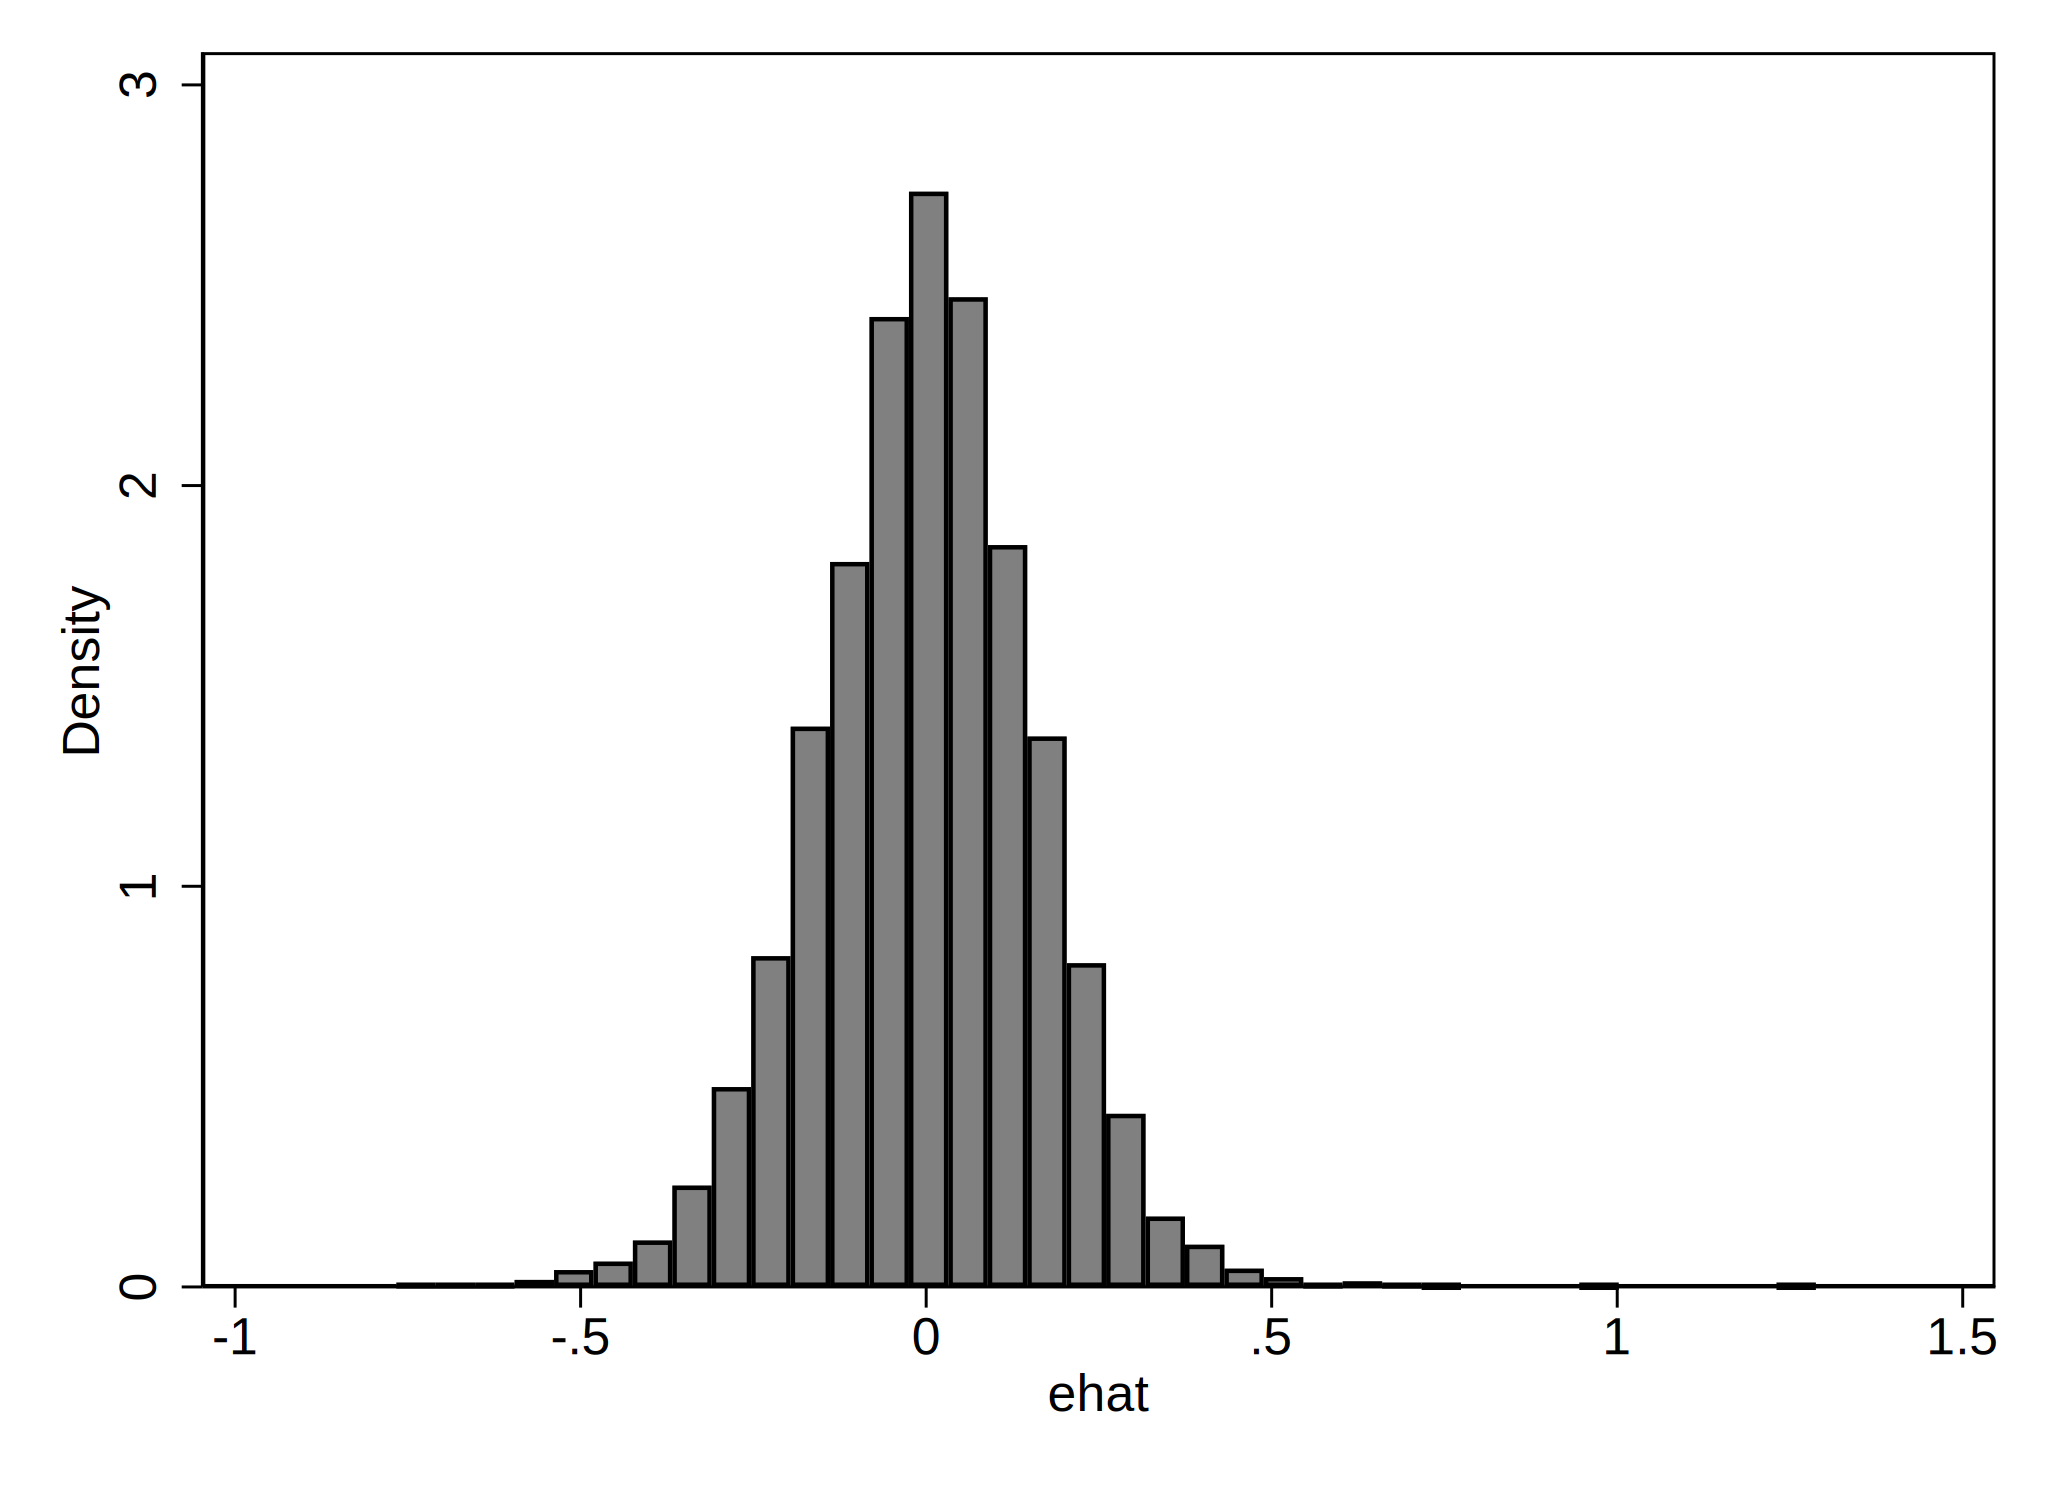

In [8]:
%%stata
predict FKG_hat, xb
gen ehat = FKG - FKG_hat
set scheme s1mono
histogram ehat